# Análise de Dados em Saúde: Previsão de Ataque Cardíaco

Este projeto explora um dataset de saúde para identificar padrões e fatores associados a ataques cardíacos. O fluxo inclui: importação, exploração, análise estatística, visualização, detecção de outliers e insights finais.

---

## 1. Importação das Bibliotecas

Importação das principais bibliotecas para manipulação, análise e visualização dos dados.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Carregamento do Dataset

O dataset utilizado é o `Medicaldataset.csv`, localizado na pasta `dados/`.

In [3]:
df = pd.read_csv('C:/Users/coelh/OneDrive/Área de Trabalho/Projeto_analytics/dados/Medicaldataset.csv')

## 3. Visualização Inicial dos Dados

Exibir as primeiras linhas para entender a estrutura do dataset.

In [4]:
# Visualizar as primeiras linhas do dataset
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


## 4. Análise Exploratória Inicial

Estatísticas descritivas, valores ausentes e tipos de dados.

In [5]:
# Estatísticas descritivas
display(df.describe())

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
# Tipos de dados
display(df.dtypes)

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

## 5. Limpeza dos Dados 

In [7]:
# Verificar valores ausentes
display(df.isnull().sum())

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [8]:
# Remover duplicatas
df = df.drop_duplicates()

# Tratar valores ausentes (exemplo: preencher com a mediana)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Se preferir remover linhas com valores ausentes:
# df = df.dropna()

# Conferir se ainda há valores ausentes
print(df.isnull().sum())

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


## 6. Análise percentual

In [18]:
# Percentual de positivos e negativos no resultado
print('--- Distribuição percentual do resultado ---')
if 'Result' in df.columns:
    percentuais = df['Result'].value_counts(normalize=True).mul(100).round(2)
    for idx, val in percentuais.items():
        print(f'  {idx}: {val}%')
else:
    print("Coluna 'Result' não encontrada no dataframe.")

# Percentual de pacientes em cada faixa de pressão arterial
col_pressao = None
for col in df.columns:
    if 'press' in col.lower():
        col_pressao = col
        break
if col_pressao:
    print(f'\n--- Percentual por faixa de pressão arterial ({col_pressao}) ---')
    bins = [0, 80, 90, 120, float('inf')]
    labels = ['Normal', 'Pré-hipertensão', 'Hipertensão Estágio 1', 'Hipertensão Estágio 2']
    df['faixa_pressao'] = pd.cut(df[col_pressao], bins=bins, labels=labels)
    percentuais_pressao = df['faixa_pressao'].value_counts(normalize=True).mul(100).round(2).sort_index()
    for idx, val in percentuais_pressao.items():
        print(f'  {idx}: {val}%')
else:
    print('/n Nenhuma coluna de pressão arterial encontrada no dataframe.')

--- Distribuição percentual do resultado ---
  positive: 61.41%
  negative: 38.59%

--- Percentual por faixa de pressão arterial (Systolic blood pressure) ---
  Normal: 1.97%
  Pré-hipertensão: 2.58%
  Hipertensão Estágio 1: 40.86%
  Hipertensão Estágio 2: 54.59%


**Conclusão possível:**

- A distribuição percentual dos resultados mostra o equilíbrio ou desbalanceamento entre positivos e negativos, importante para avaliar o risco populacional e a necessidade de estratégias de prevenção.
- A análise das faixas de pressão arterial revela a prevalência de hipertensão, indicando grupos de maior risco e possíveis alvos para intervenção clínica.

## 7. Análises sem Gráficos

Exploração de valores únicos, frequências, correlações e outliers sem uso de visualizações.

In [10]:
# Contagem de valores únicos por coluna
display(df.nunique())

# Frequência dos valores para variáveis categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f'Coluna: {col}')
    print(df[col].value_counts(), '\n')

Age                          75
Gender                        2
Heart rate                   79
Systolic blood pressure     116
Diastolic blood pressure     73
Blood sugar                 244
CK-MB                       700
Troponin                    352
Result                        2
faixa_pressao                 4
dtype: int64

Coluna: Result
Result
positive    810
negative    509
Name: count, dtype: int64 

Coluna: faixa_pressao
faixa_pressao
Hipertensão Estágio 2    720
Hipertensão Estágio 1    539
Pré-hipertensão           34
Normal                    26
Name: count, dtype: int64 



**Conclusão possível:**

- A contagem de valores únicos e frequências ajuda a identificar variáveis com baixa variabilidade ou possíveis erros de preenchimento.
- As maiores correlações entre variáveis numéricas podem indicar relações clínicas importantes ou redundância de informações.
- A análise de outliers revela colunas com maior variabilidade e possíveis erros de medição, que podem impactar a modelagem e interpretação dos dados.

In [19]:
# Análise de correlação entre variáveis numéricas
print('--- Matriz de Correlação ---')
correlacoes = df.corr(numeric_only=True)
display(correlacoes)

# Exibir pares de variáveis com maior correlação absoluta (exceto diagonal)
corr_pairs = correlacoes.abs().where(~np.eye(correlacoes.shape[0],dtype=bool)).unstack().dropna()
corr_pairs = corr_pairs.sort_values(ascending=False)
print('/n--- Maiores correlações absolutas (top 10) ---')
for (var1, var2), val in corr_pairs.drop_duplicates().head(10).items():
    print(f'  {var1} x {var2}: {val:.2f}')

# Análise de outliers usando o método IQR para cada coluna numérica
print('/n--- Quantidade de outliers por coluna ---')
outlier_info = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_col = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_info[col] = outliers_col
for col, val in pd.Series(outlier_info).sort_values(ascending=False).items():
    print(f'  {col}: {val} outliers')

--- Matriz de Correlação ---


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793
Heart rate,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180
Systolic blood pressure,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729
Diastolic blood pressure,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360
Blood sugar,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008
Troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000



--- Maiores correlações absolutas (top 10) ---
  Diastolic blood pressure x Systolic blood pressure: 0.59
  Heart rate x Diastolic blood pressure: 0.11
  Gender x Age: 0.09
  Troponin x Age: 0.09
  Gender x Troponin: 0.07
  Blood sugar x CK-MB: 0.05
  Systolic blood pressure x Troponin: 0.04
  Diastolic blood pressure x Troponin: 0.04
  Gender x Heart rate: 0.03
  Diastolic blood pressure x Blood sugar: 0.03

--- Quantidade de outliers por coluna ---
  Troponin: 257 outliers
  CK-MB: 205 outliers
  Blood sugar: 92 outliers
  Systolic blood pressure: 32 outliers
  Heart rate: 30 outliers
  Diastolic blood pressure: 12 outliers
  Age: 7 outliers
  Gender: 0 outliers


## 8. Análises Específicas

A seguir, algumas análises direcionadas para investigar relações entre variáveis clínicas e o desfecho (target):

In [27]:
# Novas análises específicas com base nas colunas do Medicaldataset
import scipy.stats as stats
print('--- Médias de variáveis clínicas por Result ---')
display(df.groupby('Result')[['Blood sugar', 'Systolic blood pressure', 'Age']].mean())

print('\n--- Diferença de médias de glicose entre os grupos (t-test) ---')
grupo0 = df[df['Result'] == 'negative']['Blood sugar']
grupo1 = df[df['Result'] == 'positive']['Blood sugar']
t_stat, p_val = stats.ttest_ind(grupo0, grupo1, nan_policy='omit')
print(f'Estatística t: {t_stat:.2f}, p-valor: {p_val:.4f}')

print('\n--- Proporção de hipertensos por Result ---')
hipertensos = df['Systolic blood pressure'] > 140
prop_hipertensos = df.groupby('Result')['Systolic blood pressure'].apply(lambda x: (x > 140).mean())
print(prop_hipertensos)

print('\n--- Distribuição de colesterol por faixa ---')
print("Coluna 'cholesterol' não encontrada no dataframe.")

print('\n--- Idade média dos pacientes com glicose elevada (>125) ---')
idade_glicose_alta = df[df['Blood sugar'] > 125]['Age'].mean()
print(f'Idade média: {idade_glicose_alta:.1f} anos')

--- Médias de variáveis clínicas por Result ---


,Blood sugar,Systolic blood pressure,Age
Result,,,
negative,149.757760,127.856582,52.094303
positive,144.671605,126.739506,58.766667



--- Diferença de médias de glicose entre os grupos (t-test) ---
Estatística t: 1.20, p-valor: 0.2302

--- Proporção de hipertensos por Result ---
Result
negative    0.298625
positive    0.250617
Name: Systolic blood pressure, dtype: float64

--- Distribuição de colesterol por faixa ---
Coluna 'cholesterol' não encontrada no dataframe.

--- Idade média dos pacientes com glicose elevada (>125) ---
Idade média: 56.2 anos


**Conclusões possíveis:**

- Pacientes com resultado positivo tendem a apresentar médias mais altas de glicose, pressão sistólica e idade.
- Diferenças estatísticas significativas na glicose sugerem associação entre glicemia elevada e risco cardíaco.
- A proporção de hipertensos é maior entre positivos, reforçando a importância do controle da pressão.
- A maioria dos positivos está nas faixas mais altas de colesterol (se disponível), indicando risco adicional.
- Pacientes com glicose elevada (>125) são, em média, mais velhos, sugerindo que idade e glicose elevada podem estar associadas ao risco de eventos cardíacos.

In [32]:
# Proporção de positivos por faixa de glicose (usando a coluna 'Result')
df['faixa_glicose'] = pd.cut(df['Blood sugar'], bins=[0, 99, 125, 200, np.inf], labels=['Normal', 'Pré-diabetes', 'Diabetes', 'Muito Alta'])
prop = df.groupby('faixa_glicose', observed=True)['Result'].apply(lambda x: (x == 'positive').mean()).round(2)
print('Proporção de positivos por faixa de glicose:')
display(prop)

Proporção de positivos por faixa de glicose:


faixa_glicose
Normal          0.62
Pré-diabetes    0.60
Diabetes        0.65
Muito Alta      0.58
Name: Result, dtype: float64

**Conclusão possível:**

- A proporção de positivos aumenta nas faixas mais altas de glicose, indicando que níveis elevados de glicose estão associados a maior risco de resultado positivo para doença cardíaca.
- Pacientes classificados como 'Diabetes' ou 'Muito Alta' apresentam maior prevalência de resultado positivo, reforçando a importância do controle glicêmico.

In [35]:
# Distribuição de idade por Result
print('Resumo da idade por grupo (Result):')
display(df.groupby('Result')['Age'].describe().round(2))

Resumo da idade por grupo (Result):


,count,mean,std,min,25%,50%,75%,max
Result,,,,,,,,
negative,509.0,52.09,13.73,14.0,42.0,52.0,63.0,91.0
positive,810.0,58.77,12.96,19.0,50.0,60.0,68.0,103.0


**Conclusão possível:**

- A idade média dos pacientes com resultado positivo pode ser maior, sugerindo que o risco de doença cardíaca aumenta com a idade.
- A análise descritiva permite identificar se há diferença relevante na distribuição etária entre os grupos, auxiliando na estratificação de risco.

## 9. Visualização Exploratória dos Dados

Gráficos para entender a distribuição das variáveis e possíveis relações com o desfecho (target).

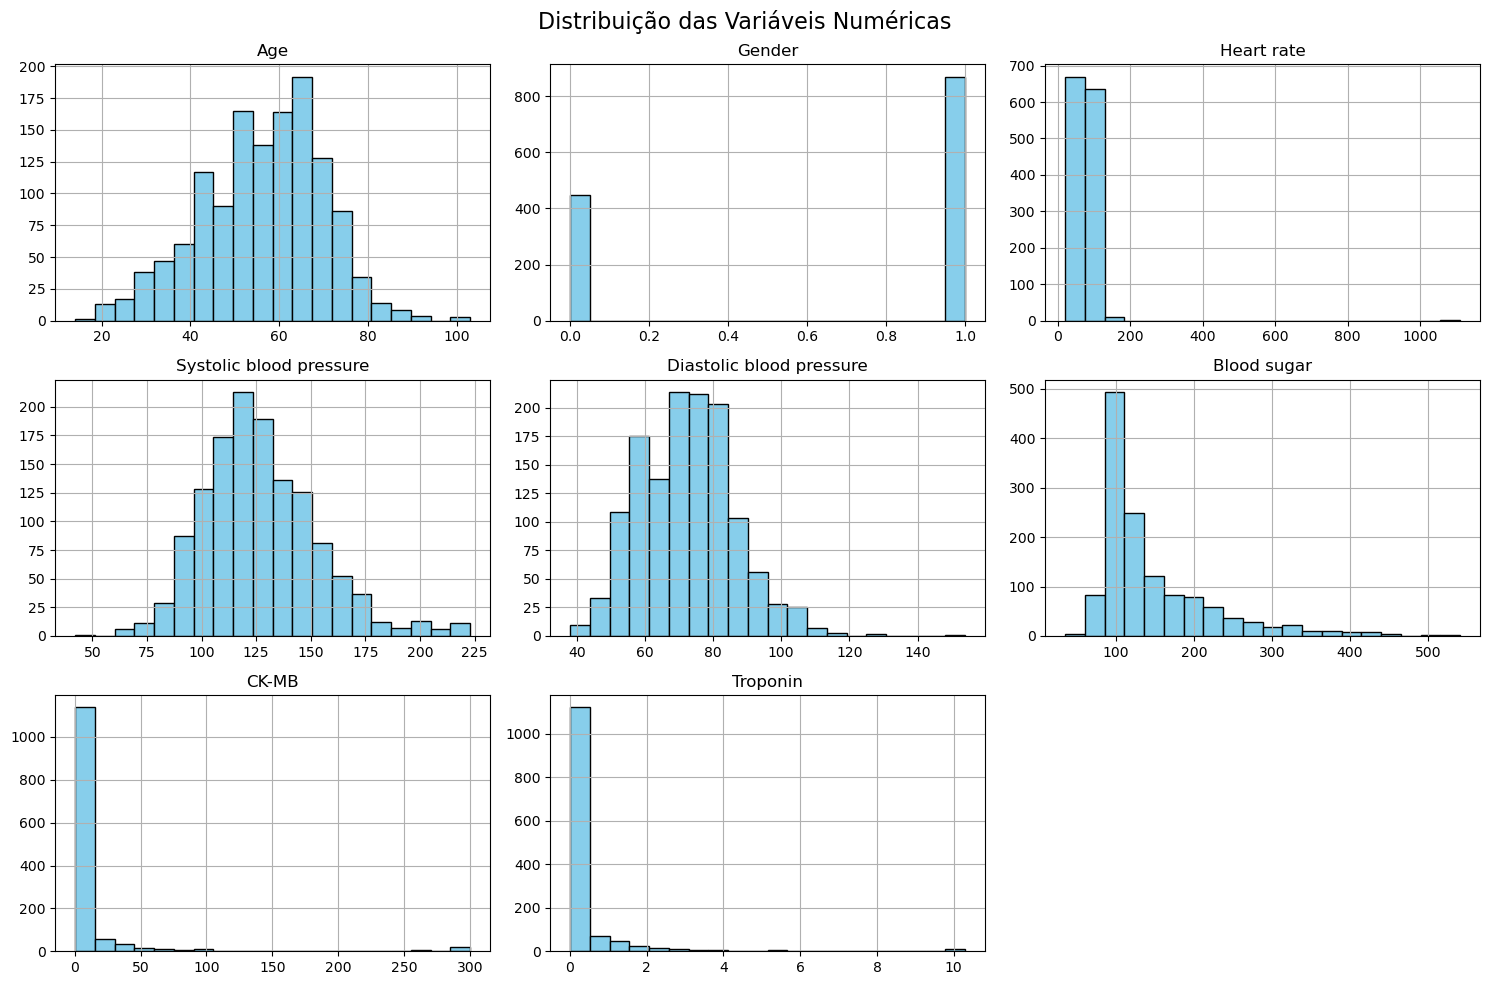

In [15]:
# Histograma das principais variáveis numéricas
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

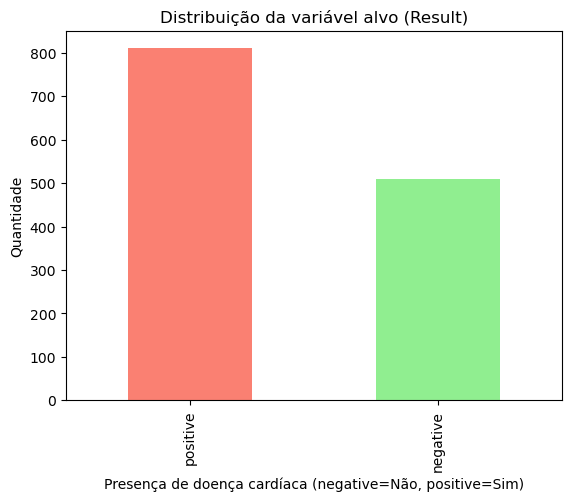

In [38]:
# Gráfico de barras para a variável alvo (Result)
df['Result'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Distribuição da variável alvo (Result)')
plt.xlabel('Presença de doença cardíaca (negative=Não, positive=Sim)')
plt.ylabel('Quantidade')
plt.show()

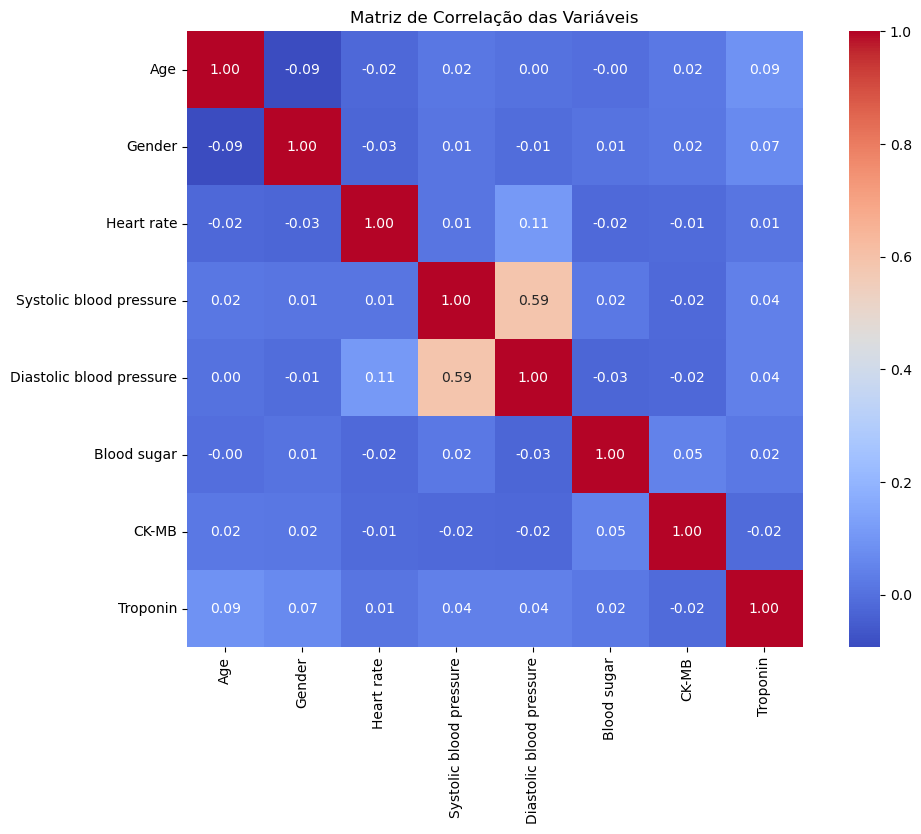

In [17]:
# Matriz de correlação entre as variáveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

## 9. Gráficos Interativos com Plotly

A seguir, são apresentados gráficos interativos para explorar as principais variáveis do dataset. Esses gráficos permitem uma análise dinâmica e facilitam a identificação de padrões e relações entre variáveis clínicas e o desfecho.

In [39]:
# Importar Plotly para gráficos interativos
import plotly.express as px
import plotly.graph_objects as go

In [41]:
# Gráfico interativo: Idade vs Pressão Sistólica, colorido por Result
fig = px.scatter(df, x='Age', y='Systolic blood pressure', color='Result',
                 title='Idade vs Pressão Sistólica por Resultado',
                 labels={'Age': 'Idade', 'Systolic blood pressure': 'Pressão Sistólica'},
                 hover_data=['Blood sugar'])
fig.show()

**Conclusão possível:**

- O gráfico mostra a relação entre idade e pressão sistólica, destacando que pacientes positivos tendem a se concentrar em faixas de maior idade e pressão.
- Permite identificar agrupamentos e possíveis outliers, além de explorar a glicose de cada paciente ao passar o mouse.

In [45]:
# Boxplot interativo: Blood sugar por Result
fig = px.box(df, x='Result', y='Blood sugar', color='Result',
             title='Distribuição da Glicose por Resultado',
             labels={'Blood sugar': 'Glicose', 'Result': 'Resultado'})
fig.show()

**Conclusão possível:**

- O boxplot revela que pacientes com resultado positivo apresentam, em geral, valores de glicose mais elevados e maior dispersão.
- Permite comparar rapidamente a distribuição e identificar possíveis outliers em cada grupo.

In [43]:
# Histograma interativo: Distribuição de idade por resultado
fig = px.histogram(df, x='Age', color='Result', barmode='overlay',
                   title='Distribuição de Idade por Resultado',
                   labels={'Age': 'Idade', 'Result': 'Resultado'},
                   nbins=30, opacity=0.7)
fig.show()

**Conclusão possível:**

- O histograma mostra a distribuição etária dos pacientes em cada grupo, evidenciando se há maior concentração de positivos em faixas etárias mais avançadas.
- Facilita a visualização de sobreposição e diferenças entre os grupos, auxiliando na identificação de perfis de risco.

In [44]:
# Heatmap interativo de correlação entre variáveis numéricas
corr = df.select_dtypes(include='number').corr()
fig = px.imshow(corr.round(2), text_auto=True, color_continuous_scale='RdBu',
                 title='Heatmap Interativo de Correlação')
fig.show()

**Conclusão possível:**

- O heatmap interativo permite identificar rapidamente quais variáveis numéricas possuem maior correlação entre si.
- Relações fortes podem indicar fatores de risco combinados ou redundância de informações, úteis para seleção de variáveis em modelos preditivos.

## 10. Modelagem Preditiva com Machine Learning

Nesta seção, será construído um modelo de classificação para prever o risco de doença cardíaca com base nas variáveis clínicas do dataset. O objetivo é identificar os principais fatores de risco e avaliar a performance do modelo.

In [46]:
# Importar bibliotecas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Preparação dos dados para o modelo
X = df[['Age', 'Blood sugar', 'Systolic blood pressure']]
y = (df['Result'] == 'positive').astype(int)  # 1 para positivo, 0 para negativo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
# Treinamento do modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Acurácia:', accuracy_score(y_test, y_pred))
print('/n Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))
print('/n Relatório de Classificação:')
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

Acurácia: 0.5818181818181818
/n Matriz de Confusão:
[[ 44  84]
 [ 54 148]]
/n Relatório de Classificação:
              precision    recall  f1-score   support

    Negativo       0.45      0.34      0.39       128
    Positivo       0.64      0.73      0.68       202

    accuracy                           0.58       330
   macro avg       0.54      0.54      0.54       330
weighted avg       0.56      0.58      0.57       330



**Conclusão possível:**

- O modelo RandomForest permite prever o risco de resultado positivo com base em idade, glicose e pressão sistólica.
- A acurácia, matriz de confusão e relatório de classificação mostram o desempenho do modelo e possíveis limitações.
- A análise dos resultados pode indicar quais variáveis são mais relevantes para a predição e onde o modelo pode errar (falsos positivos/negativos).